<a href="https://colab.research.google.com/github/esmaeilifardi/KNeighborsClassifier---Iris-Dataset/blob/main/KNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [ ]:
df['target']= iris.target

X = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7) #shuffle=True(default) 

In [ ]:
# roye dade az jense target aslan fit estefade nemikonim manande x_test hamintor baraye jense yha mananade y_train va y_test
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled  = ss.transform(X_test)          #فیت نمی کنیم چون انگاری از قبل بهش تغلب رسانده ایم به عبارتی دیتا لیکیج اتفاق نیوفتد نفوذ دیتا

In [ ]:
# kolliat mozo:

knn =  KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [ ]:
#y_test = y_test.reshape((1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


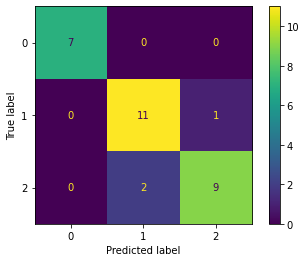

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test_scaled, y_test)

In [ ]:
print( classification_report(y_pred, y_test) ) #print nazanim moratab nemishavad jadvale khoroji

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      0.85      0.88        13
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
# K روش های تعیین پارامتر:

In [ ]:
# Elbow روش:

In [ ]:
error_ratio = []

for k in range(1, 30):
  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  errors = 1- accuracy_score(y_pred, y_test)
  error_ratio.append(errors)


Text(0, 0.5, 'error ratio')

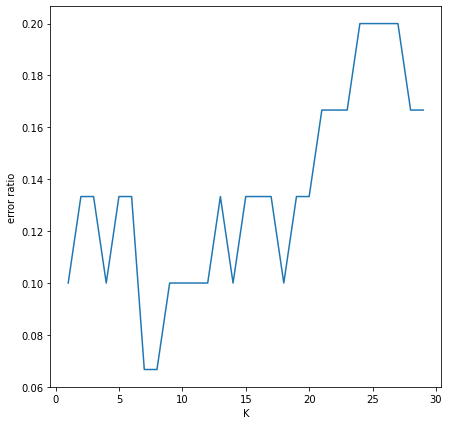

In [ ]:
# shortcut to Elbow
# pd.DataFrame(final_model.cv_results_)['mean_test_score'].plot()
     
plt.figure(figsize=(7, 7))
plt.plot( range(1,30), error_ratio )
plt.xlabel('K')
plt.ylabel('error ratio')

In [ ]:
# GridsearchCV روش:

In [ ]:
operation = [ ('ss', ss), ('knn', knn) ]

from sklearn.pipeline import Pipeline   

pipe = Pipeline(operation)            # steps: list of tuple

from sklearn.model_selection import GridSearchCV
k_values = list( range(1, 30) )
param_grid = { 'knn__n_neighbors': k_values }           # dar pipe bayad ba in format nevesht: model__parameter        # dict or list of dictionaries

final_model = GridSearchCV(pipe, param_grid, cv=5, scoring= 'accuracy')
final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_test_scaled)

final_model.best_estimator_.get_params

# knn.get_params()
# knn.get_params().keys()

<bound method Pipeline.get_params of Pipeline(steps=[('ss', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])>

In [ ]:
print( classification_report(y_pred, y_test) ) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.86      0.92        14
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
# test gereftan az model:

knn =  KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(y_test)


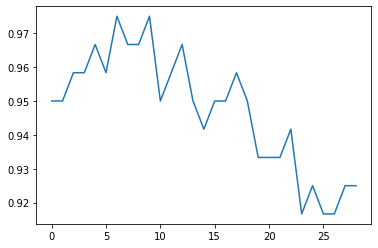

In [ ]:
pd.DataFrame(final_model.cv_results_)['mean_test_score'].plot()     # shortcut Elbow